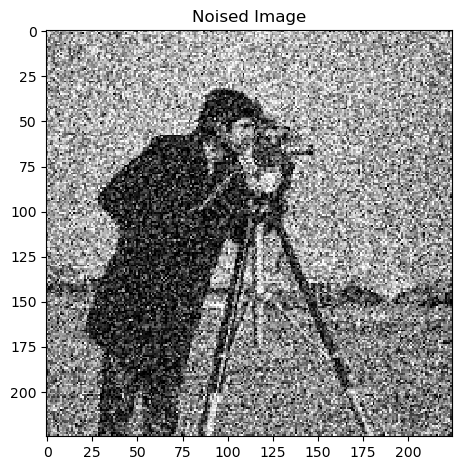

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_uint
from skimage.io import imshow, imread
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

image = cv2.imread(r"C:\Users\ML\Desktop\123B1F033\noised_image.jfif")
plt.title("Noised Image")

imshow(image)

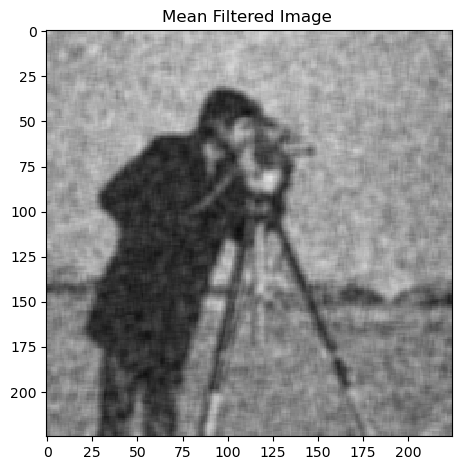

In [38]:
# filtering by mean filter
blur=cv2.blur(image,(5,5))
plt.title("Mean Filtered Image ")

imshow(blur)

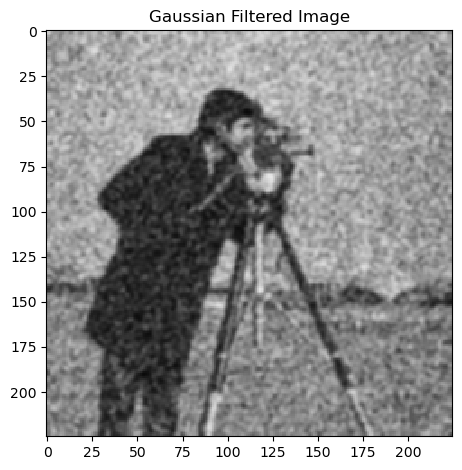

In [36]:
# filtering by Gaussian filter
blur2=cv2.GaussianBlur(image,(5,5),0)
plt.title("Gaussian Filtered Image")

imshow(blur2)

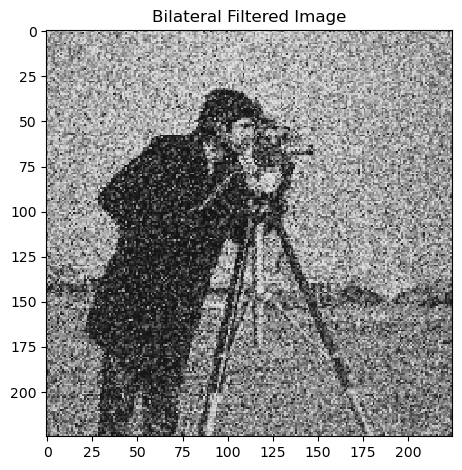

In [56]:
bilateral=cv2.bilateralFilter(image,100,100,100)
plt.title("Bilateral Filtered Image")

imshow(bilateral)

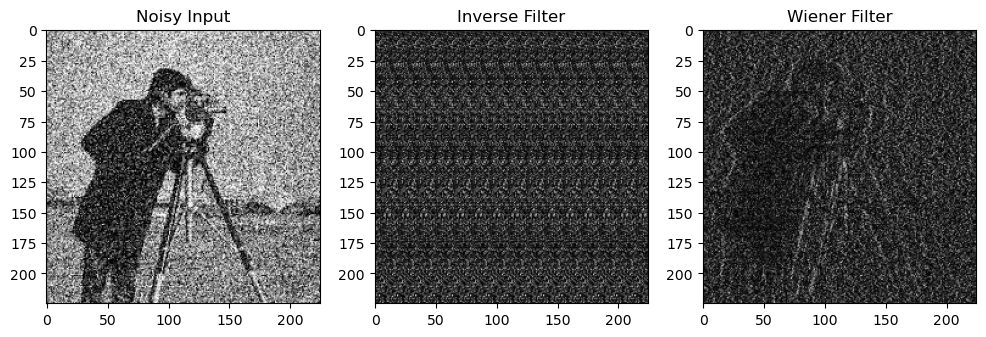

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2

# ---------- Load your image (grayscale) ----------
image = cv2.imread(r"C:\Users\ML\Desktop\123B1F033\noised_image.jfif", 0)
img = image / 255.0   # normalize to [0,1]

# ---------- Define motion blur kernel (assumption) ----------
def motion_blur_kernel(size=4):
    kernel = np.zeros((size, size))
    kernel[size//2, :] = np.ones(size)
    return kernel / size

h = motion_blur_kernel(15)

# ---------- Fourier Transform ----------
G = fft2(img)
H = fft2(h, s=img.shape)

# ---------- Inverse Filter ----------
def inverse_filter(G, H):
    eps = 1e-3   # avoid division by zero
    F_hat = G / (H + eps)
    return np.abs(ifft2(F_hat))

# ---------- Wiener Filter ----------
def wiener_filter(G, H, K=0.01):
    H_conj = np.conj(H)
    F_hat = (H_conj / (np.abs(H)**2 + K)) * G
    return np.abs(ifft2(F_hat))

# ---------- Restore ----------
restored_inverse = inverse_filter(G, H)
restored_wiener = wiener_filter(G, H, K=0.01)

# ---------- Show Results ----------
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.title("Noisy Input")
plt.imshow(img, cmap='gray');

plt.subplot(1,3,2); plt.title("Inverse Filter")
plt.imshow(restored_inverse, cmap='gray'); 

plt.subplot(1,3,3); plt.title("Wiener Filter")
plt.imshow(restored_wiener, cmap='gray'); 
plt.show()
